### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

In the experiment that tests the Stroop Effect, the dependent variable is the congruency of word color to the word name. Changing the congruency of the word name and color is how the effect is observed. The independent variable is the time the subjects take to complete the test. When conducting the test and analyzing the data, we want to see if there is a significant difference in the time each subject took to complete the test under both test conitions. 

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

$$H_0: \mu_{I} = \mu_{C}$$
$$H_1: \mu_{I} > \mu_{C}$$

- The null hypothesis ($H_0$) states that the population mean of subjects' time for the Incongruent test ($\mu_{I}$) is equal to the population mean of their times for the Congruent test ($\mu_{C}$).
- The alternative hypothesis ($H_1$) states that the population mean of subjects' time for the Incongruent test is greater than the population mean of their times for the Congruent test.
- Because I want to test the hypthosis that the Incongruent test times are longer than the Congruent test times, I am not simply testing for a significant difference ($\neq$) in the means. 
To test the hypotheses, we will conduct a one-tailed paired t-test. The test will be one-tailed because the inequality in our alternative hypothesis is unidirectional. We are using a t-test because our sample size of 24 is less than 30, so the t-distribution will help us account for our non-normal samples. We are using a paired test because the samples are related to each other. The two columns in the dataset are paired test completion times for 24 test subjects. So each row of the data is two results for a single subject, which means the Incongruent result is related to the Congruent result for each row of the data. 

### Loading the Data

In [2]:
# import packages
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# load data into pandas dataframe and inspect the dataframe
df = pd.read_csv("stroopdata.csv")
df.head()

FileNotFoundError: File b'stroopdata.csv' does not exist

In [ ]:
df[:,1]

In [3]:
# get the count for both variables and check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


### Analysis

In [4]:
# get descriptive statistics for the variables
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [5]:
# calculate interquartile ranges for both variables
df.Congruent.quantile(0.75)-df.Congruent.quantile(0.25), df.Incongruent.quantile(0.75)-df.Incongruent.quantile(0.25)

(4.3054999999999986, 5.33475)

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

**Means** - measure of central tendancy
- The mean time subjects took to complete the Congruent test is **14.05** seconds.
- The mean time subjects took to complete the Incongruent test is **22.02** seconds.

**Interquartile Range** - measure of variability  
Since the sample size is less than 30, it is not normally distributed, so we don't look too closely at standard deviation. Interquartile range gives us an idea of the variability, or spread, of the data.
- The interquartile range of the Congruent test times is **4.31** seconds.
- The interquartile range of the Incongruent test tiems is **5.33** seconds.

**Minimum and Maximum Values**
- The minimum time a subject took to complete the Congruent test is **8.63** seconds, and the maximum is **22.33** seconds.
- The minimum time a subject took to complete the Incongruent test is **15.69** seconds, and the maximum is **35.26** seconds. 

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

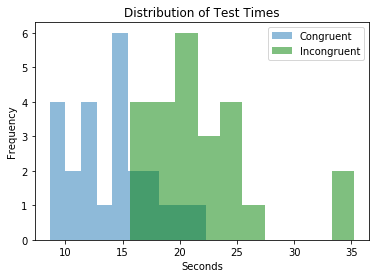

In [6]:
# making a stacked histogram 
df['Congruent'].hist(alpha=0.5, label='Congruent')
df['Incongruent'].hist(alpha=0.5, color='green', label='Incongruent')
plt.title('Distribution of Test Times')
plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False);

Stacking the histograms makes its easy to see that the distribution of Incongruent scores is concentrated further out on the x-axis than the Congruent scores. So, most of the Incongruent tests took longer to complete than the Congruent tests did. The histograms also show that neither groups are normally disctributed. 

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [7]:
# perform a T-Test
stats.ttest_rel(df.Congruent, df.Incongruent)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)

In [8]:
# calculate the p-value for a one-sided test
4.103000585711178e-08/2

2.051500292855589e-08

The p-value for the one sided t-test calculated above satisfies our 5% Type 1 Error rate threshold. Because the p-value is below our threshold, we have sufficient evidence to reject the null hypothesis, that the mean of the Incongruent test times is equal to the mean of the Congruent test times.  
The result matches with my expectation. The expected increased difficulty of the Incongruent portion of the Stroop Test is supported by our rejection of the null hypothesis. 

### Resources
- http://ci.columbia.edu/ci/premba_test/c0331/s7/s7_4.html
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html 
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.grid.html
- http://web.ift.uib.no/Teori/KURS/WRK/TeX/symALL.html 
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.var.html 
- https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_rel.html 